In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac_s

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
mnist = fetch_mldata("MNIST-original")
data = mnist.data / 255.0
target = mnist.target.astype("int0")

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1/7, random_state=666)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
result = np.empty(test_target.__len__()).astype(int)

data_from_file = open("save_file.txt").read()

for enum, ch in enumerate(data_from_file):
    result[enum] = int(ch)
    
result

array([5, 2, 3, ..., 0, 2, 9])

In [4]:
ac_s(test_target, result)

0.9751

In [5]:
diff_positions = np.argwhere(test_target != result)
same_positions = np.argwhere(test_target == result)

In [6]:
# let's count size of classes
unique, counts = np.unique(test_target, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 943, 1153,  998,  990,  959,  898, 1017, 1049,  986, 1007]))

In [7]:
unique, right_answers_count = np.unique(result[same_positions], return_counts = True)
right_answers_count

array([ 939, 1143,  976,  952,  932,  858, 1010, 1019,  946,  976])

In [8]:
wrong_answers_each_class = counts - right_answers_count
wrong_answers_each_class

array([ 4, 10, 22, 38, 27, 40,  7, 30, 40, 31])

In [9]:
conf_matr = confusion_matrix(test_target, result)
conf_matr

array([[ 939,    0,    1,    0,    0,    0,    1,    0,    2,    0],
       [   0, 1143,    3,    3,    1,    0,    0,    3,    0,    0],
       [   6,    3,  976,    1,    0,    0,    1,    7,    3,    1],
       [   3,    2,    5,  952,    0,    6,    0,    2,   14,    6],
       [   1,    4,    1,    1,  932,    0,    3,    0,    1,   16],
       [   6,    0,    0,   11,    0,  858,   16,    0,    6,    1],
       [   3,    3,    0,    0,    0,    1, 1010,    0,    0,    0],
       [   0,    7,    4,    0,    3,    0,    0, 1019,    1,   15],
       [   2,   13,    0,    6,    1,    4,    5,    2,  946,    7],
       [   4,    2,    0,   11,    4,    2,    0,    7,    1,  976]])

In [10]:
for i in range(10):
    conf_matr[i, i] = 0

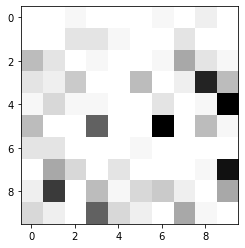

In [42]:
plt.imshow(conf_matr, cmap="Greys")

plt.savefig("error_map.png")

plt.show()

[ 4 10 22 38 27 40  7 30 40 31]


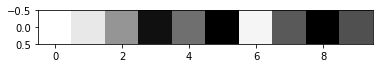

In [12]:
print(wrong_answers_each_class)
plt.imshow(wrong_answers_each_class[None,:], cmap="Greys")
plt.show()

In [13]:
test_target_3 = np.argwhere(test_target == 3)
error_3_8 = test_target_3[np.argwhere(result[test_target_3] == 8)][:, 0]
error_3_8.__len__() # прекрасно, всё верно

14

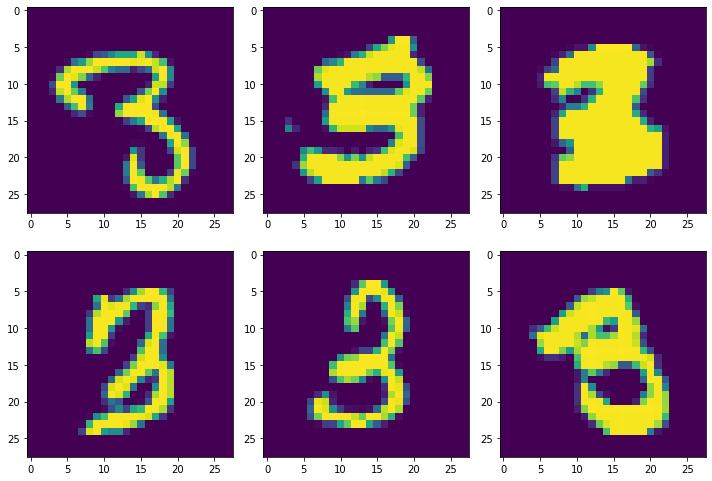

In [34]:
test_target_3 = np.argwhere(test_target == 3)
error_3_8 = test_target_3[np.argwhere(result[test_target_3] == 8)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])



axs[0, 0].imshow(test_data[error_3_8[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error_3_8[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error_3_8[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error_3_8[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error_3_8[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error_3_8[12]].reshape(28, 28))

plt.savefig("error_3_8.png")

plt.show()

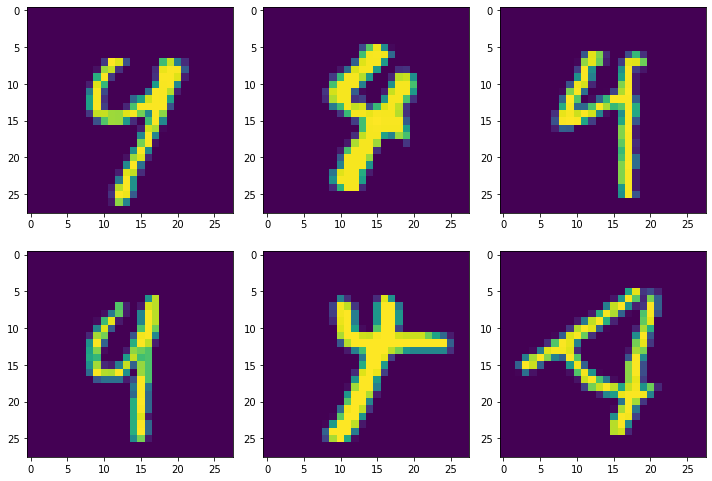

In [35]:
test_target_4 = np.argwhere(test_target == 4)
error_4_9= test_target_4[np.argwhere(result[test_target_4] == 9)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error_4_9[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error_4_9[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error_4_9[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error_4_9[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error_4_9[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error_4_9[12]].reshape(28, 28))

plt.savefig("error_4_9.png")

plt.show()

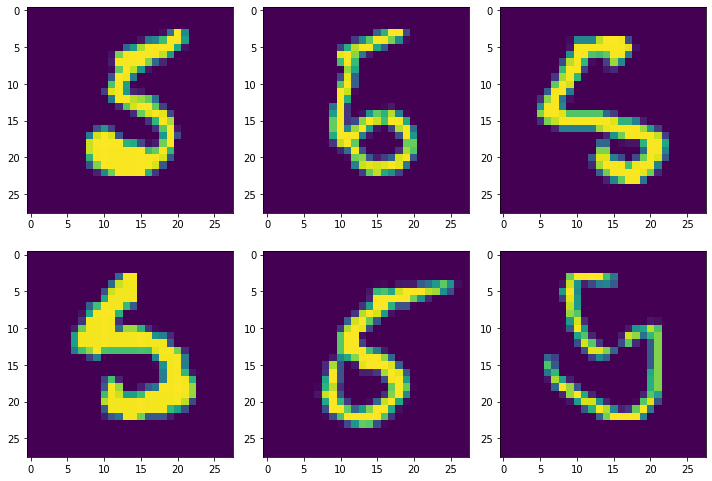

In [36]:
test_target_5= np.argwhere(test_target == 5)
error = test_target_5[np.argwhere(result[test_target_5] == 6)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[12]].reshape(28, 28))

plt.savefig("error_5_6.png")

plt.show()

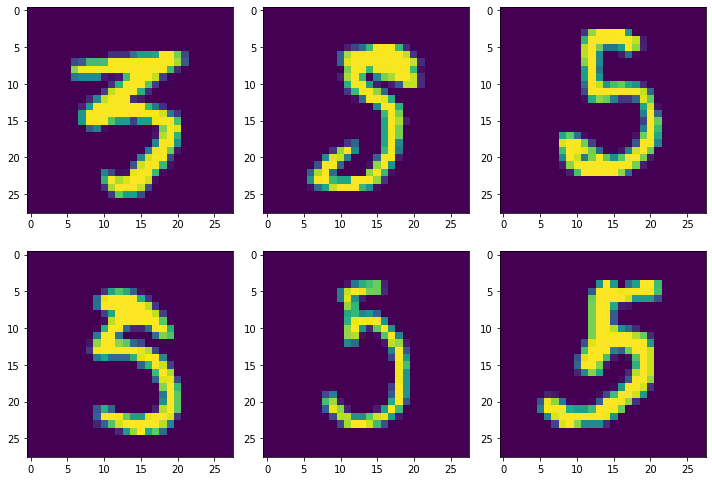

In [37]:
test_target_5 = np.argwhere(test_target == 5)
error = test_target_5[np.argwhere(result[test_target_5] == 3)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[2]].reshape(28, 28))

plt.savefig("error_5_3.png")

plt.show()

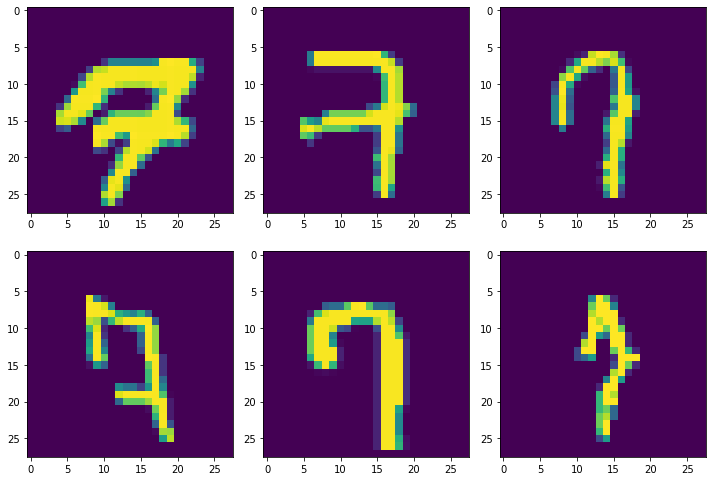

In [38]:
test_target_7 = np.argwhere(test_target == 7)
error = test_target_7[np.argwhere(result[test_target_7] == 9)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[12]].reshape(28, 28))

plt.savefig("error_7_9.png")

plt.show()

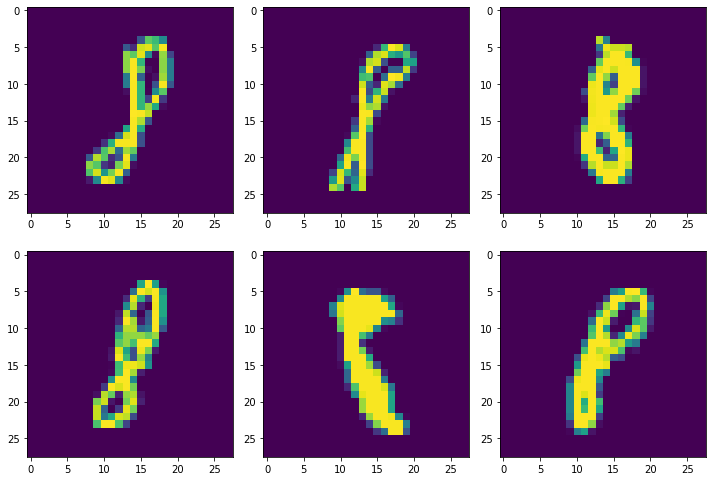

In [39]:
test_target_8 = np.argwhere(test_target == 8)
error = test_target_8[np.argwhere(result[test_target_8] == 1)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[12]].reshape(28, 28))

plt.savefig("error_8_1.png")

plt.show()

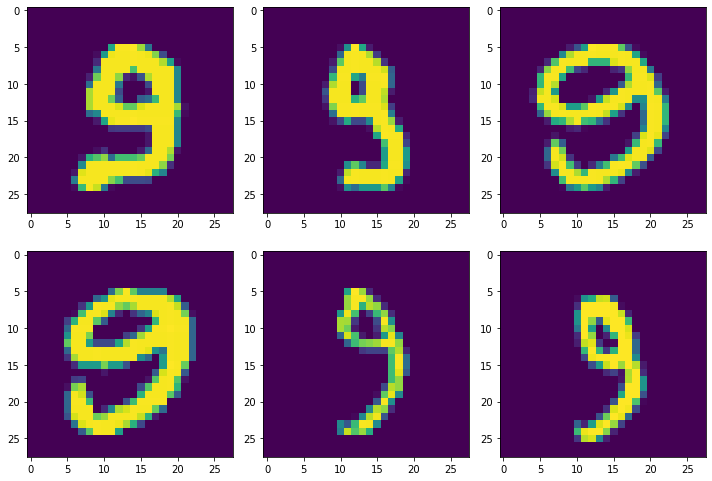

In [41]:
test_target_9 = np.argwhere(test_target == 9)
error = test_target_9[np.argwhere(result[test_target_9] == 3)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=[10, 8])

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[4]].reshape(28, 28))

plt.savefig("error_9_3.png")

plt.show()